# Migration Data Download

Get occurrence data from the Global Biodiversity Information Facility
(GBIF)

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [26]:
%store -r gdf2 df2 project

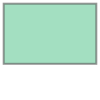

In [8]:
# Merge the GBIF observations into a single geometry
gbif_union = gdf2.geometry.union_all().envelope
gbif_union

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Run the code below, which converts your Polygon to a special type of
GeoJSON needed for compatibility with the ArcGIS Feature Service. Check
out and explore this data structure. How would you extract the
geographic coordinates?</p></div></div>

In [9]:
# Convert geometry to geoJSON
gbif_geojson = gbif_union.__geo_interface__

gbif_geojson

{'type': 'Polygon',
 'coordinates': (((-4.17, 42.38),
   (3.32788, 42.38),
   (3.32788, 47.24778),
   (-4.17, 47.24778),
   (-4.17, 42.38)),)}

In [10]:
# Convert geometry to geoJSON
gbif_geojson = gbif_union.__geo_interface__

gbif_geojson

{'type': 'Polygon',
 'coordinates': (((-4.17, 42.38),
   (3.32788, 42.38),
   (3.32788, 47.24778),
   (-4.17, 47.24778),
   (-4.17, 42.38)),)}

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>What type of Python object is this geoJSON? How will you get the
geographic coordinates only?</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Replace <code>feature-key</code> with the coordinate key you noted
above.</li>
<li>Replace CRS with the CRS of your GBIF download. It should be
formatted as a 4-digit number, e.g. if the CRS is EPSG:1234, you should
put <code>1234</code> into Python.</li>
</ol></div></div>

In [16]:
# Construct ArcGIS-compatible JSON
import json

arcgis_geom = json.dumps(dict(
    rings=gbif_geojson["coordinates"],
    spatialReference={"wkid": 4326}
))

In [7]:
# Construct ArcGIS-compatible JSON
arcgis_geom = json.dumps(dict(
    rings=gbif_geojson["coordinates"],
    spatialReference={"wkid": 4326}
))

### STEP 2: Download data from the ArcGIS FeatureService

In [20]:
# Prepare API request
import requests
from io import BytesIO
import geopandas as gpd

eco_url = (
    "https://services5.arcgis.com/0AFsQflykfA9lXZn"
    "/ArcGIS/rest/services"
    "/WWF_Terrestrial_Ecoregions_Of_The_World_official_teow"
    "/FeatureServer/0/query")
eco_params = {
    "f": "geojson",
    "where": "1=1",
    "outFields": "area_km2",
    "returnGeometry": "true",
    # Return polygons containing any GBIF observation
    "spatialRel": "esriSpatialRelIntersects",  
    "geometryType": "esriGeometryPolygon",
    # Override web Mercator server default
    "inSR": 4326,
    "outSR": 4326,
    # Must format geometry
    "geometry": arcgis_geom
}

# Submit API request
eco_resp = requests.get(
    eco_url, params=eco_params,
    headers={"Accept-Encoding": "identity"})
eco_resp.raise_for_status()

# Load binary data to DataFrame
eco_gdf = gpd.read_file(BytesIO(eco_resp.content))

# Check the download
eco_gdf.head()

,area_km2,geometry
0,400447,"POLYGON ((-2.23125 46.99704, -2.24296 46.98405..."
1,400447,"POLYGON ((-1.54836 46.2385, -1.51872 46.24842,..."
2,79846,"POLYGON ((-1.55955 43.49799, -1.54609 43.50015..."
3,90851,"POLYGON ((5.20185 44.99814, 5.20222 44.99814, ..."
4,493836,"POLYGON ((9.7741 52.13832, 9.78681 52.13611, 9..."


In [9]:
# Prepare API request
eco_url = (
    "https://services5.arcgis.com/0AFsQflykfA9lXZn"
    "/ArcGIS/rest/services"
    "/WWF_Terrestrial_Ecoregions_Of_The_World_official_teow"
    "/FeatureServer/0/query")
eco_params = {
    "f": "geojson",
    "where": "1=1",
    "outFields": "eco_code,area_km2",
    "returnGeometry": "true",
    # Return polygons containing any GBIF observation
    "spatialRel": "esriSpatialRelIntersects",  
    "geometryType": "esriGeometryPolygon",
    # Override web Mercator server default
    "inSR": "4326",
    "outSR": "4326",
    # Must format geometry
    "geometry": arcgis_geom
}

# Submit API request
eco_resp = requests.get(
    eco_url, params=eco_params,
    headers={"Accept-Encoding": "identity"})
eco_resp.raise_for_status()

# Load binary data to DataFrame
eco_gdf = gpd.read_file(BytesIO(eco_resp.content))

# Check the download
eco_gdf.head()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Now, make a quick plot of your download to make sure that it worked
correctly.</p></div></div>

In [10]:
# Plot the ecoregion data

<Axes: >

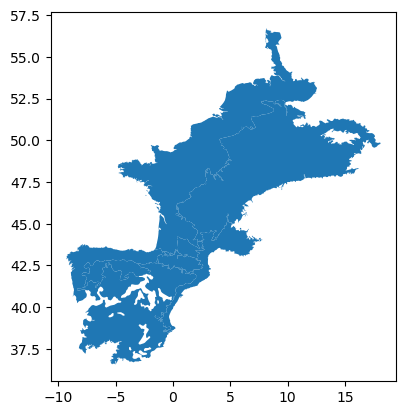

In [21]:
# Plot the ecoregion data
eco_gdf.plot()

### STEP 3 (Optional): Save your data

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Create a new directory in your data directory for the ecoregions
data.</li>
<li>Define a path to a Shapefile where you will save the ecoregions
data.</li>
<li>Save the ecoregions to the file.</li>
</ol></div></div>

In [22]:
# Save the ecoregion data

%store eco_gdf df2

Stored 'eco_gdf' (GeoDataFrame)
Stored 'df2' (DataFrame)


In [27]:
# Save the ecoregion data
eco_dir = project.project_dir / 'ecoregions'
eco_dir.mkdir(exist_ok=True)
eco_path = eco_dir / 'ecoregions.shp'
eco_gdf.to_file(eco_path)